In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [12]:
os.chdir("D:\Masters\MachineLearning\Project")

In [40]:
features = list()
with open('UCI HAR Dataset/features.txt') as f:
    features = [line.split(' ')[1].strip() for line in f.readlines()]

In [41]:
train = pd.read_csv('UCI HAR Dataset/train/X_train.txt',sep='\s+', header=None, names=features)

y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

train['Activity'] = y_train
train['ActivityName'] = y_train_labels

In [42]:
test = pd.read_csv('UCI HAR Dataset/test/X_test.txt',sep='\s+', header=None, names=features)

y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

test['Activity'] = y_test
test['ActivityName'] = y_test_labels

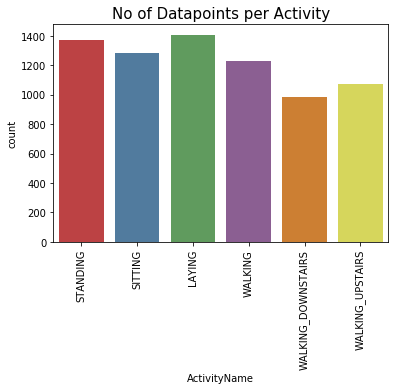

In [43]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

# Observation
    Our data is well balanced (almost)

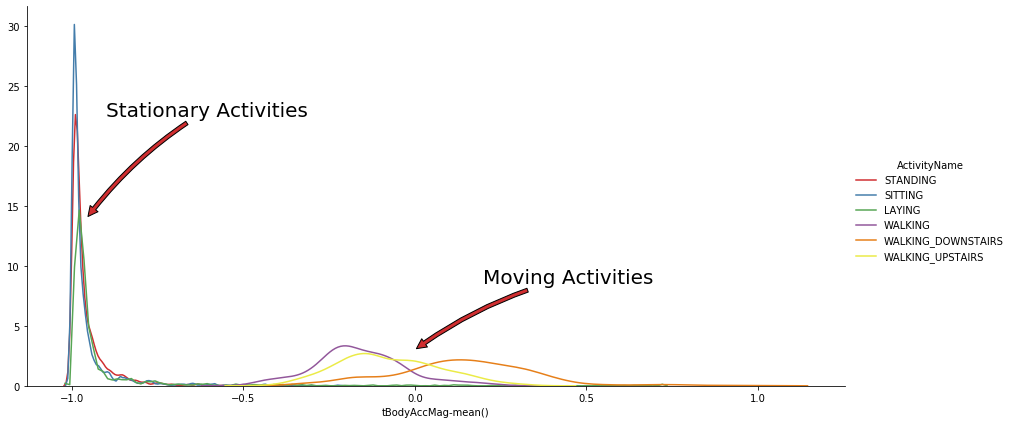

In [44]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,14), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

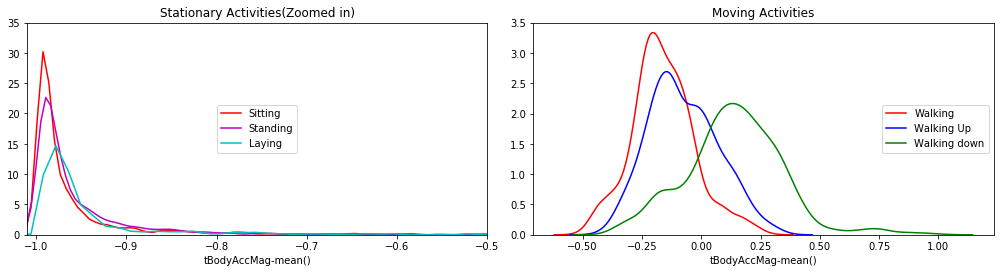

In [45]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMag-mean()'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMag-mean()'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMag-mean()'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMag-mean()'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMag-mean()'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMag-mean()'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()